In [17]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [19]:
df= pd.read_csv("Titanic-Dataset.csv")

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [23]:
df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)

In [24]:
categorical_features = ['Sex', 'Embarked']
numerical_features = ['Age', 'Fare']

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [26]:
df.dropna(inplace=True)

In [27]:
df.duplicated().sum()

0

Text(0.5, 1.0, 'Titanic Genders on Board')

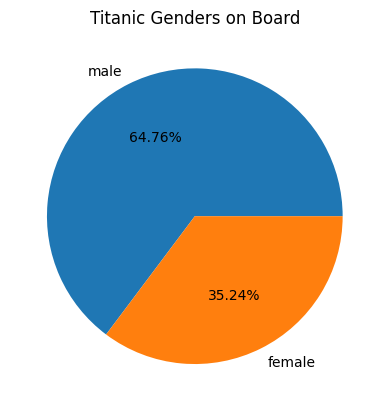

In [28]:
Sex_Count = df['Sex'].value_counts()
plt.pie(Sex_Count.values,labels = Sex_Count.index, rotatelabels = False , autopct='%1.2f%%')
plt.title('Titanic Genders on Board')

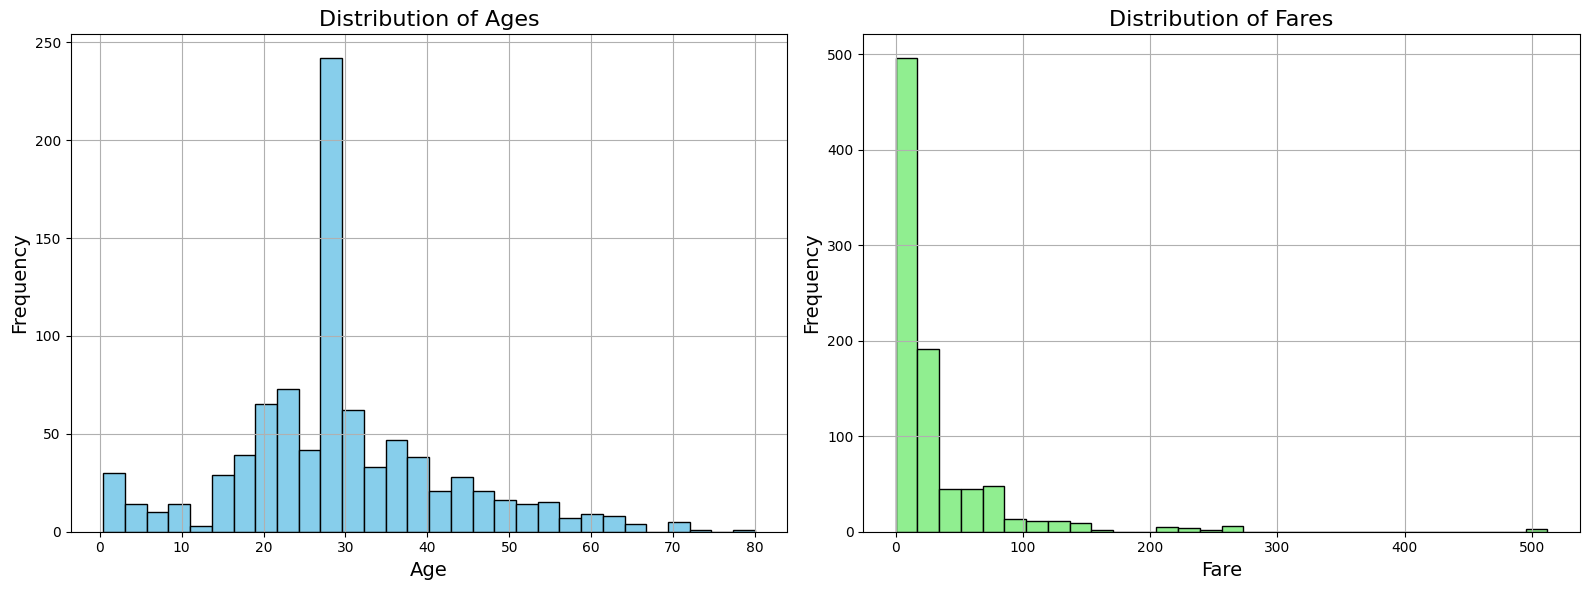

In [29]:
# Adding Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Age distribution
axes[0].hist(df['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Ages', fontsize=16)
axes[0].set_xlabel('Age', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].grid(True)

# Fare distribution
axes[1].hist(df['Fare'].dropna(), bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribution of Fares', fontsize=16)
axes[1].set_xlabel('Fare', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].grid(True)

plt.tight_layout()
plt.show()

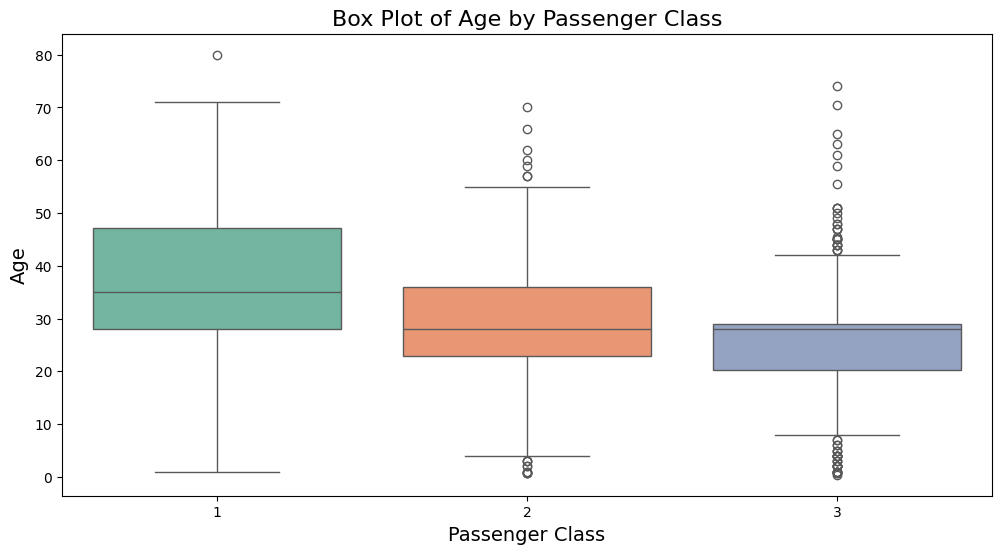

In [30]:
# Advanced Visualization with Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', data=df, palette='Set2')
plt.title('Box Plot of Age by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

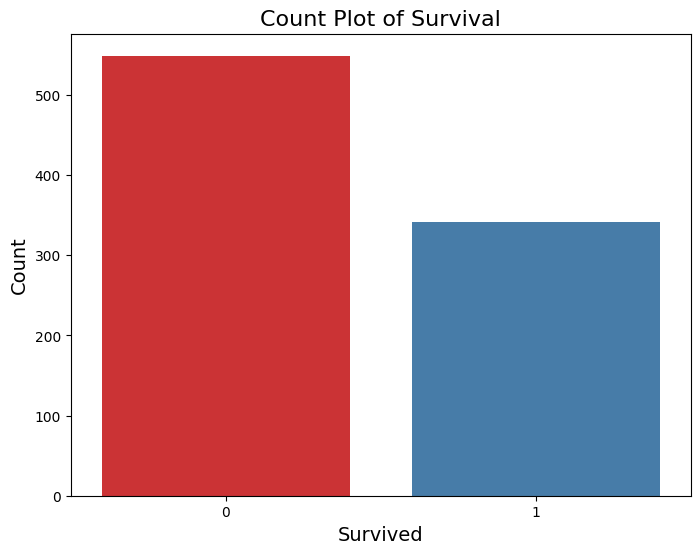

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df, palette='Set1')
plt.title('Count Plot of Survival', fontsize=16)
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

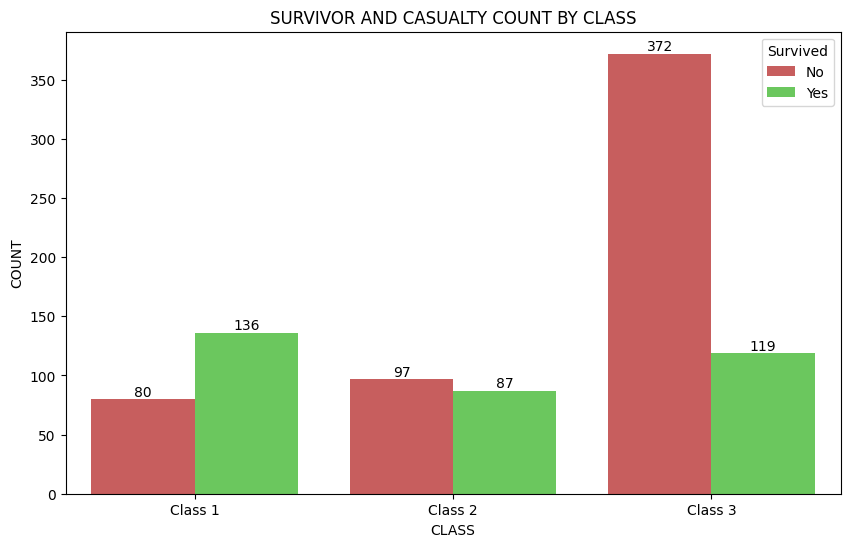

In [32]:
pal3=['#D84D4D', '#5ED84D','#D84D4D', '#5ED84D','#D84D4D', '#5ED84D']
plt.figure(figsize=(10, 6))
a=sns.countplot(data=df, x='Pclass', hue='Survived', palette= pal3)
for container in a.containers:
    a.bar_label(container)
plt.title('SURVIVOR AND CASUALTY COUNT BY CLASS')
plt.xlabel('CLASS')
plt.ylabel('COUNT')
plt.legend(title='Survived', labels=['No', 'Yes']) 
plt.gca().set_xticklabels(['Class 1', 'Class 2', 'Class 3'])
plt.show()

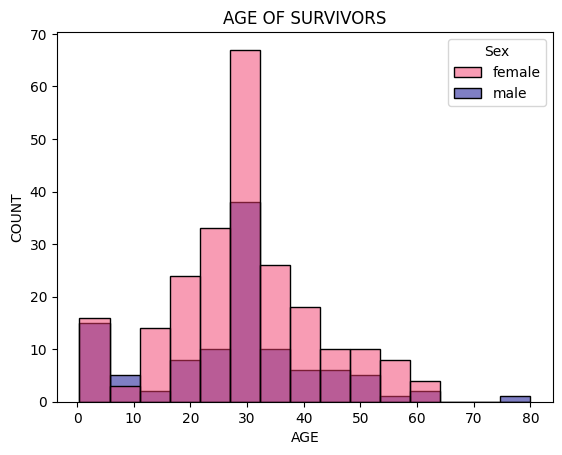

In [33]:
pal1= ['#F33A6A', '#00008B']
survivors= df[df['Survived']==1]
sns.histplot(data= survivors, x= survivors['Age'], bins= 15, hue=survivors['Sex'], palette= pal1)
plt.title("AGE OF SURVIVORS")
plt.xlabel('AGE')
plt.ylabel('COUNT')
plt.show()

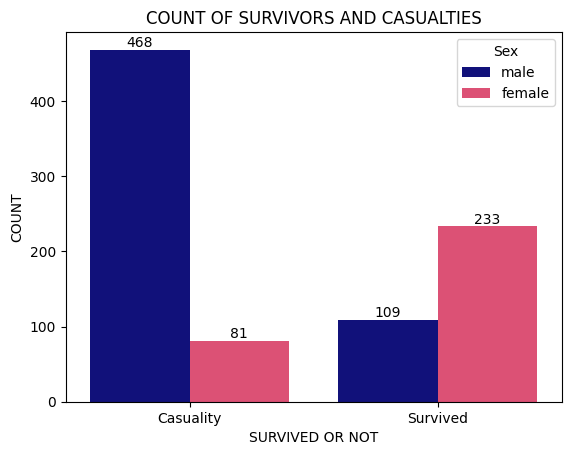

In [34]:
pal= ['#00008B', '#F33A6A']
a= sns.countplot(data= df, x= df['Survived'], hue=df['Sex'], palette= pal)
for container in a.containers:
    a.bar_label(container)
plt.title("COUNT OF SURVIVORS AND CASUALTIES")
plt.xlabel("SURVIVED OR NOT")
plt.ylabel("COUNT")
plt.gca().set_xticklabels(['Casuality', 'Survived'])
plt.show()

In [35]:
df['Sex_numeric']= df['Sex'].apply(lambda x:1 if x=='female' else 0)
df[['Survived', 'Pclass', 'Age', 'Sex_numeric', 'SibSp', 'Parch', 'Fare']].corr().style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,Sex_numeric,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,0.543351,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,-0.131900,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.081163,-0.233296,-0.172482,0.096688
Sex_numeric,0.543351,-0.131900,-0.081163,1.000000,0.114631,0.245489,0.182333
SibSp,-0.035322,0.083081,-0.233296,0.114631,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.245489,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.182333,0.159651,0.216225,1.000000


In [36]:
from sklearn.model_selection import train_test_split
X= df[['Sex_numeric', 'Parch', 'Fare']]
y= df['Survived']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 44)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.75

In [38]:
from sklearn.metrics import confusion_matrix
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_matrix

,0,1
0,129,35
1,32,72
